## Binomial Tree Model

In a binomial tree model for a stock price, we assume that at each time step, the stock could be in either up or down states with unequal payoffs characteristic of a risky security. Assuming the initial stock price at time $t=0$ is \$1, at the next time step $t=1$ the price is $u$ in the up state and $d$ in the down state with up-state transition probability $p$. A binomial tree model for the first two time steps is shown below:

<img src="figures/binomial_tree.png">

We can use Monte Carlo simulations to generate uncertainty estimates of the terminal stock price after some time horizon $T$. When using a binomial model to describe the price process of the stock, we can use the following callibration:

\begin{eqnarray}
u = \exp \bigg(\sigma \sqrt{T/n}\bigg) = 1/d \\
p = \frac{1}{2} + \frac{1}{2}\bigg(\frac{\mu}{\sigma}\bigg)\sqrt{T/n}
\end{eqnarray}

where $T$ is the length of prediction horizon in years and $n$ is the number of time steps. We assume $1$ year equals $252$ trading days, $1$ month equals $21$ days, $1$ week equals $5$ days and $1$ day equals $8$ hours. Let's simulate the stock price using the binomial model with a daily time step for two different time horizons: $1$ month from today and $1$ year from today. 

In [2]:
%matplotlib inline
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#model parameters
mu = 0.1      #mean
sigma = 0.15  #volatility
S0 = 1        #starting price
    
N = 10000     #number of simulations
T = [21.0/252, 1.0]  #time horizon in years
step = 1.0/252       #time step in years

In [4]:
#compute state price and probability
u = np.exp(sigma * np.sqrt(step))    #up state price
d = 1.0/u                            #down state price
p = 0.5+0.5*(mu/sigma)*np.sqrt(step) #prob of up state

In [5]:
#binomial tree simulation
up_times = np.zeros((N, len(T)))
down_times = np.zeros((N, len(T)))
for idx in range(len(T)):
    up_times[:,idx] = np.random.binomial(T[idx]/step, p, N)
    down_times[:,idx] = T[idx]/step - up_times[:,idx]

In [6]:
#compute terminal price
ST = S0 * u**up_times * d**down_times

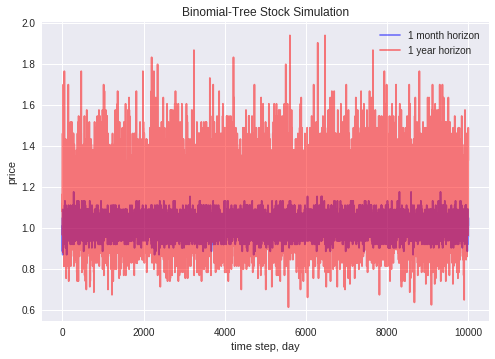

In [7]:
#generate plots
plt.figure()
plt.plot(ST[:,0], color='b', alpha=0.5, label='1 month horizon')
plt.plot(ST[:,1], color='r', alpha=0.5, label='1 year horizon')
plt.xlabel('time step, day')
plt.ylabel('price')
plt.title('Binomial-Tree Stock Simulation')
plt.legend()
plt.show()

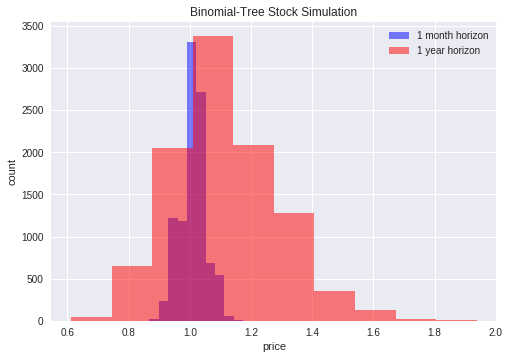

In [8]:
plt.figure()
plt.hist(ST[:,0], color='b', alpha=0.5, label='1 month horizon')
plt.hist(ST[:,1], color='r', alpha=0.5, label='1 year horizon')
plt.xlabel('price')
plt.ylabel('count')
plt.title('Binomial-Tree Stock Simulation')
plt.legend()
plt.show()

We can see from the above plots that our yearly estimates have higher volatility compared to the monthly estimates.